from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.model_selection import train_test_split
from pathlib import Path
# ^^^ pyforest auto-imports - don't write above this line
# KNearest Neighbors Regression.

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions).

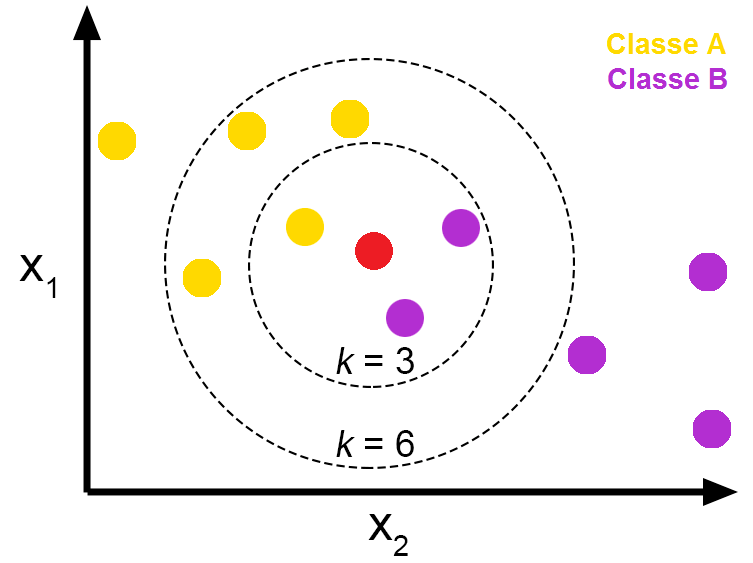

In [3]:
from PIL import Image
Image.open('Images/KReg.png')

In [4]:
#Importing The Dataset...

df = pd.read_csv('Datasets/Fuel Consumption.csv')

<IPython.core.display.Javascript object>

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
#Checking the Null values in the Dataset..

df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
#HEre some of the Columns data is in Rows .so changing it into NUmbers.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()

lab =label.fit(df['FUELTYPE']) #Changing labels Text to number

df['FUELTYPE'] = lab.transform(df['FUELTYPE'])
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,3,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,3,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,3,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,3,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,3,12.1,8.7,10.6,27,244


In [9]:
#Here THere is NO Null Values..

In [20]:
# Dividing the Dataset .

X = df[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']] #Here these aree the independent Features.

y = df[['CO2EMISSIONS']] #HEre co2 Emission is the Target Value..

In [22]:
print(X.head())
print(y.head())

   MODELYEAR  ENGINESIZE  CYLINDERS  FUELTYPE  FUELCONSUMPTION_CITY  \
0       2014         2.0          4         3                   9.9   
1       2014         2.4          4         3                  11.2   
2       2014         1.5          4         3                   6.0   
3       2014         3.5          6         3                  12.7   
4       2014         3.5          6         3                  12.1   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                  6.7                   8.5                        33  
1                  7.7                   9.6                        29  
2                  5.8                   5.9                        48  
3                  9.1                  11.1                        25  
4                  8.7                  10.6                        27  
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


In [30]:
#Importing the Algorithm KNN Regressor.

from sklearn.neighbors import KNeighborsRegressor

In [31]:
#Data is divided into train and test ..

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [41]:
#Now Data is passed to the Algorthm for Training the MOdel afyter creating Object..

knn =KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [42]:
#Checking the Model Accuracy score...
knn.score(X_train,y_train) #DURing Training

0.9816918616101872

In [43]:
#Checking the Model accuracy on the Testing Data....

knn.score(X_test,y_test)

0.9779487129218832

# Example-2

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
from sklearn.datasets import load_boston

In [54]:
bost=load_boston()

In [56]:
#MAking tho the DataFrame..

df = pd.DataFrame(bost['data'],columns=bost['feature_names'])

df['target'] = bost['target']

<IPython.core.display.Javascript object>

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
X = df.drop('target',axis =1)

y = df[['target']]

In [68]:
knn = KNeighborsRegressor()

In [69]:
#Making the Data for Trainig and Testing the data..

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<IPython.core.display.Javascript object>

In [71]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [75]:
knn.score(X_train,y_train)*100

68.3920398193585

In [76]:
knn.score(X_test,y_test)*100

64.73640882039258

In [77]:
#Scores of the Model.

# Here we got 68 for Training the MOdel.
#HEre we got 64 for testing data 